In [1]:
import kastredux
import kastclassify
from splat.utilities import typeToNum
import astropy.io.fits as fits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
import copy

In [2]:
def find_in_tag_arr(df, qtag):
    tag_arr = np.array([ ( (tag is not np.nan ) and ( qtag in tag ) ) for tag in df['tags'].values ])
    
    return tag_arr

In [3]:
df = pd.read_csv('/home/ryan/projects/data_prods/Kast_classify/Kastclassify_spectra_calculations_20200624 - Kastclassify_spectra_calculations_20200624.csv')

In [4]:
df

name                           filename                 tags  \
0    J0225+6229   kastRED_J0225+6229_20200203.fits  lto, scq, spt_fixed   
1    J1300+3038   kastRED_J1300+3038_20200305.fits                 None   
2    J1733+1655   kastRED_J1733+1655_20180717.fits                 None   
3    J0813-1522   kastRED_J0813-1522_20200204.fits                 None   
4    J0120+3302   kastRED_J0120+3302_20190918.fits                 None   
..          ...                                ...                  ...   
236  J0730-0339  kastRED_J0730-0339B_20200206.fits              S/N, NO   
237   0002+0115   kastRED_J0002+0115_20170813.fits                 None   
238   2340+3433   kastRED_J2340+3433_20170813.fits                 None   
239   0914+1809   kastRED_J0914+1809_20180307.fits                 None   
240  J2254+2527   kastRED_J2254+2527_20180717.fits                 None   

           RA        DEC                 OBSDATE   spt  subtype      spt_chi2  \
0     2:25:26   62:29:58  2020-02-04T02:55:25.18  M7.0      7.0  1.801702e+06   
1    13:00:07   30:38:58  2020-03-06T11:10:41.12  M6.0      6.0  1.501861e+05   
2    17:33:53   16:55:13  2018-07-18T08:19:45.17  M6.0      6.0  1.023361e+07   
3     8:13:19  -15:22:38  2020-02-05T07:12:29.07  M5.0      5.0  1.451320e+06   
4     1:20:29   33:02:39  2019-09-18T09:34:34.14  M7.0      7.0  6.501996e+05   
..        ...        ...                     ...   ...      ...           ...   
236   7:30:30   -3:39:34  2020-02-07T08:52:25.85  M0.0      0.0  1.315998e+04   
237   0:02:07    1:15:36  2017-08-13T09:55:11.60  M7.0      7.0  1.056695e+06   
238  23:40:23   34:33:15  2017-08-13T08:15:13.38  M6.0      6.0  1.347700e+06   
239   9:14:41   18:09:44  2018-03-07T06:46:56.69  M5.0      5.0  5.761317e+04   
240  22:54:11   25:27:57  2018-07-18T10:43:27.72  M6.0      6.0  1.225363e+06   

        spt_scale  ...  gizis_CaH2_spt_err  gizis_CaH3_spt  \
0    5.770000e-15  ...            0.054384        5.110205   
1    7.160000e-15  ...            0.062521        6.924109   
2    3.000000e-13  ...            0.008222        4.898452   
3    3.290000e-14  ...            0.025675        2.512415   
4    9.700000e-15  ...            0.054607        5.503352   
..            ...  ...                 ...             ...   
236  5.990000e-17  ...            4.334505      -13.666174   
237  5.890000e-15  ...            0.043697        4.851991   
238  5.790000e-14  ...            0.023647        4.246150   
239  9.240000e-15  ...            0.139273        4.309733   
240  1.340000e-14  ...            0.022018        5.195346   

     gizis_CaH3_spt_err  lepine_spt  lepine_spt_err      zeta   zeta_err  \
0              0.126098    4.567336        0.064775  1.076942   0.010493   
1              0.114539    5.801550        0.058665  0.971940   0.008203   
2              0.018464    4.293615        0.009145  1.037346   0.001561   
3              0.047323    2.393990        0.024869  1.022973   0.007507   
4              0.069161    4.878508        0.044596  1.037826   0.007411   
..                  ...         ...             ...       ...        ...   
236           19.884730   -4.574286        6.454904 -4.601281  30.116135   
237            0.096675    4.484323        0.040508  1.077229   0.007425   
238            0.053451    3.866284        0.024603  1.043384   0.004994   
239            0.234214    3.482445        0.127881  1.163668   0.035658   
240            0.049809    4.575481        0.025928  1.021131   0.004024   

    metallicity_class    L_Halpha/L_bol  L_Halpha/L_bol_err  
0               Dwarf         -4.28E-05            1.99E-07  
1               Dwarf         -6.89E-05            8.84E-08  
2               Dwarf  -0.0001158947319            1.44E-07  
3               Dwarf         -9.46E-05            1.82E-07  
4               Dwarf         -6.02E-05            2.25E-07  
..                ...               ...                 ...  
236               usd  -0.0001931698224      

In [5]:
def update_spts(df1, datapath, diag_path=None):   
    
    df = copy.deepcopy(df1)
    
    if diag_path is not None:

        if os.path.exists(diag_path):
            print('Path {} already exists'.format(diag_path))
        else:

            try:
                os.makedirs(diag_path)
            except OSError:
                print('Failed to create directory {}'.format(diag_path))


        print('Saving diagnostic plots to {}'.format(diag_path))
        
    names = df['name'].values
    filenames = df['filename'].values
    filepaths = [datapath + filename for filename in filenames]

    for name, filename, filepath in zip(names, filenames, filepaths):

        if diag_path is not None:
            diag_dir = diag_path + '/{}/'.format(os.path.splitext(os.path.basename(filepath))[0])
            if os.path.exists(diag_dir):
                print('Path {} already exists'.format(diag_dir))
            else:

                try:
                    os.makedirs(diag_dir)
                except OSError:
                    print('Failed to create directory {}'.format(diag_dir))
                    diag_dir = None

        sp = kastredux.readSpectrum(filepath)

        sp.name = fits.getheader(filepath)['OBJECT']
        
        spt, stand_name, spt_chi2, spt_scale = kastclassify.classify_by_standard(sp, ref='all', diag_path=diag_dir)

        df['spt'][(df['name'] == name) & (df['filename'] == filename)] = spt
        
        
        df['subtype'][(df['name'] == name) & (df['filename'] == filename)] = typeToNum(spt) - 10
        
        
        df['spt_chi2'][(df['name'] == name) & (df['filename'] == filename)] = spt_chi2
        
        
        df['spt_scale'][(df['name'] == name) & (df['filename'] == filename)] = spt_scale
        
        
        
        print('Finished with {}'.format(filename))
        
    print('Updated All!')
    
    return df
    

In [6]:
updated_df = update_spts(df, datapath='/home/ryan/projects/KASTr_data/final/', diag_path='/home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE/')

Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE/ already exists
Saving diagnostic plots to /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE/
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0225+6229_20200203/ already exists
Finished with kastRED_J0225+6229_20200203.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1300+3038_20200305/ already exists
Finished with kastRED_J1300+3038_20200305.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1733+1655_20180717/ already exists
Finished with kastRED_J1733+1655_20180717.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0813-1522_20200204/ already exists
Finished with kastRED_J0813-1522_20200204.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0120+3302_20190918/ already exists
Finished with kastRED_J0120+3302_20190918.fits
Path /home/

Finished with kastRED_J0819-1345C_20200206.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0420-1458_20200206/ already exists
Finished with kastRED_J0420-1458_20200206.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1301+4112_20200305/ already exists
Finished with kastRED_J1301+4112_20200305.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1103+2417_20200304/ already exists
Finished with kastRED_J1103+2417_20200304.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0819-1345B_20200206/ already exists
Finished with kastRED_J0819-1345B_20200206.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1856-0822C_20190920/ already exists
Finished with kastRED_J1856-0822C_20190920.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1757+2452_20170823/ already exists
Finished with kastRED_J

Finished with kastRED_J2315-0627_20170813.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1205+5623_20180121/ already exists
Finished with kastRED_J1205+5623_20180121.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J2250-0559_20180622/ already exists
Finished with kastRED_J2250-0559_20180622.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_SN2020OI_20200111/ already exists
Finished with kastRED_SN2020OI_20200111.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1412-0035B_20190331/ already exists
Finished with kastRED_J1412-0035B_20190331.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J2254+2527B_20180622/ already exists
Finished with kastRED_J2254+2527B_20180622.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J2152+2042_20180622/ already exists
Finished with kastRED_J2152+

Finished with kastRED_J0813-1522C_20200204.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0953+2236_20200305/ already exists
Finished with kastRED_J0953+2236_20200305.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1545+1102B_20180717/ already exists
Finished with kastRED_J1545+1102B_20180717.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1220+3956_20200305/ already exists
Finished with kastRED_J1220+3956_20200305.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_LHS2973_20180717/ already exists
Finished with kastRED_LHS2973_20180717.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1833+2225B_20190918/ already exists
Finished with kastRED_J1833+2225B_20190918.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0908+1236_20200203/ already exists
Finished with kastRED_J0908+1

Finished with kastRED_J0140+2701_20190918.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1740-1650D_20190920/ already exists
Finished with kastRED_J1740-1650D_20190920.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_LHS6308_20180716/ already exists
Finished with kastRED_LHS6308_20180716.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J2210-0936_20170813/ already exists
Finished with kastRED_J2210-0936_20170813.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J0900+4733_20200305/ already exists
Finished with kastRED_J0900+4733_20200305.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1017+0719_20200203/ already exists
Finished with kastRED_J1017+0719_20200203.fits
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/OLD_DATA_UPDATE//kastRED_J1419+3137A_20190331/ already exists
Finished with kastRED_J1419+313

<Figure size 432x288 with 0 Axes>

In [7]:
updated_df.to_csv('fixed_spts.csv', index=False)

In [16]:
datapath = '/home/ryan/projects/KASTr_data/final/'
names = df['name'].values
filenames = df['filename'].values
filepaths = [datapath + filename for filename in filenames]

for name, filename, filepath in zip(names, filenames, filepaths):
    print(name, filename, filepath)

J0225+6229 kastRED_J0225+6229_20200203.fits /home/ryan/projects/KASTr_data/final/kastRED_J0225+6229_20200203.fits
J1300+3038 kastRED_J1300+3038_20200305.fits /home/ryan/projects/KASTr_data/final/kastRED_J1300+3038_20200305.fits
J1733+1655 kastRED_J1733+1655_20180717.fits /home/ryan/projects/KASTr_data/final/kastRED_J1733+1655_20180717.fits
J0813-1522 kastRED_J0813-1522_20200204.fits /home/ryan/projects/KASTr_data/final/kastRED_J0813-1522_20200204.fits
J0120+3302 kastRED_J0120+3302_20190918.fits /home/ryan/projects/KASTr_data/final/kastRED_J0120+3302_20190918.fits
J1928+1301 kastRED_J1928+1301_20190920.fits /home/ryan/projects/KASTr_data/final/kastRED_J1928+1301_20190920.fits
J1102-1624 kastRED_J1102-1624_20200311.fits /home/ryan/projects/KASTr_data/final/kastRED_J1102-1624_20200311.fits
J1856-0822 kastRED_J1856-0822B_20190920.fits /home/ryan/projects/KASTr_data/final/kastRED_J1856-0822B_20190920.fits
SN2018gv kastRED_SN2018GV_20180121.fits /home/ryan/projects/KASTr_data/final/kastRED_S

In [5]:
arr = find_in_tag_arr(df, 'scq')

In [6]:
df[arr]

name                           filename              tags  \
0    J0225+6229   kastRED_J0225+6229_20200203.fits          lto, scq   
20    1718+6802   kastRED_J1718+6802_20180622.fits          lto, scq   
24   J0428+0728   kastRED_J0428+0728_20180307.fits     lto, S/N, scq   
35   J1306+1212   kastRED_J1306+1212_20200203.fits          lto, scq   
56   J0416+1310   kastRED_J0416+1310_20200204.fits          lto, scq   
58   J1445+6447   kastRED_J1445+6447_20200311.fits     lto, S/N, scq   
77    BD+162658     kastRED_BD162658_20180307.fits  lto, S/N, scq, ?   
81   J0815+1030   kastRED_J0815+1030_20200203.fits          lto, scq   
87   J1740-1650  kastRED_J1740-1650B_20190920.fits  lto, S/N, scq, ?   
120  J0919+2154   kastRED_J0919+2154_20200305.fits          lto, scq   
157  J0908+1236   kastRED_J0908+1236_20200203.fits          lto, scq   
165  J1106+0428   kastRED_J1106+0428_20200203.fits          lto, scq   
174  J0848-2019   kastRED_J0848-2019_20200203.fits          lto, scq   
178  J1741+0940   kastRED_J1741+0940_20200305.fits          lto, scq   
181  J1314+6622   kastRED_J1314+6622_20200205.fits          lto, scq   
194  J0235-0711   kastRED_J0235-0711_20190918.fits     lto, S/N, scq   
200  J0338+0634   kastRED_J0338+0634_20190920.fits     lto, S/N, scq   
207  J1017+0719   kastRED_J1017+0719_20200203.fits          lto, scq   
211  J0325+1300   kastRED_J0325+1300_20180308.fits       lto, scq, !   
216  J0225+6229   kastRED_J0225+6229_20200107.fits          lto, scq   

           RA        DEC                 OBSDATE     spt  subtype  \
0     2:25:26   62:29:58  2020-02-04T02:55:25.18  sdM7.5      7.5   
20   17:18:24   68:02:32  2018-06-22T09:35:59.95  sdM7.5      7.5   
24    4:28:50    7:28:32  2018-03-07T04:23:37.25    M5.0      5.0   
35   13:06:25   12:12:28  2020-02-04T11:55:55.05  sdM7.5      7.5   
56    4:16:43   13:10:59  2020-02-05T04:31:57.96  sdM7.5      7.5   
58   14:45:52   64:47:56  2020-03-12T10:53:29.71    M7.0      7.0   
77   14:29:30   15:31:58  2018-03-07T08:42:31.84    M2.0      2.0   
81    8:15:14   10:30:13  2020-02-04T06:29:03.88  sdM7.5      7.5   
87   17:40:43  -16:50:35  2019-09-20T03:34:50.43  sdM2.0      2.0   
120   9:19:20   21:54:30  2020-03-06T07:33:06.74  sdM7.5      7.5   
157   9:08:26   12:36:48  2020-02-04T07:33:56.28  sdM3.0      3.0   
165  11:06:19    4:28:33  2020-02-04T11:03:34.28  sdM7.5      7.5   
174   8:48:19  -20:19:25  2020-02-04T08:34:21.46  sdM7.5      7.5   
178  17:41:54    9:40:53  2020-03-06T12:58:03.03  sdM7.5      7.5   
181  13:14:24   66:22:33  2020-02-06T11:08:36.76  sdM7.5      7.5   
194   2:35:50   -7:11:21  2019-09-18T11:37:23.55  sdM7.5      7.5   
200   3:38:07    6:34:26  2019-09-20T13:18:47.14  sdM7.5      7.5   
207  10:17:27    7:19:26  2020-02-04T09:51:05.43  sdM7.5      7.5   
211   3:25:11   13:00:33  2018-03-08T03:05:22.04  sdM7.5      7.5   
216   2:25:26   62:29:58  2020-01-08T02:29:30.52    M7.0      7.0   

         spt_chi2     spt_scale  ...  gizis_CaH2_spt_err  gizis_CaH3_spt  \
0    1.801702e+06  5.770000e-15  ...            0.054384        5.110205   
20   2.553463e+06  1.460000e-14  ...            0.023731        5.521613   
24   1.236439e+05  5.650000e-15  ...            0.120785        7.046656   
35   4.993988e+05  5.860000e-15  ...            0.049645        4.539029   
56   1.238187e+05  5.610000e-15  ...            0.192488        3.926560   
58   2.788397e+05  2.940000e-15  ...            0.063192        7.485072   
77   2.412548e+04  2.210000e-14  ...            0.375845        3.533832   
81   5.669842e+05  3.340000e-15  ...            0.068019        5.810233   
87   3.161759e+04  4.930000e-16  ...           99.898024      114.073597   
120  1.479858e+05  1.620000e-14  ...            0.147372        6.390834   
157  8.643767e+05  5.070000e-15  ...            0.058952        2.133196   
165  6.473474e+05  2.560000e-15  ...            0.087022        5.752457   
174  4.577703e+05  3.130000e-15  ...            0.069233    

Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA/ already exists
Saving diagnostic plots to /home/ryan/projects/TestingPNGs/Kast_Classify/QA/
Path /home/ryan/projects/TestingPNGs/Kast_Classify/QA//kastRED_J0225+6229_20200203/ already exists


<Figure size 432x288 with 0 Axes>

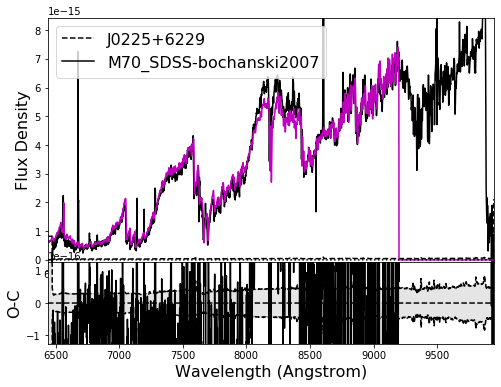

/home/ryan/projects/KASTr_data/final/kastRED_J0225+6229_20200203.fits


<Figure size 432x288 with 0 Axes>

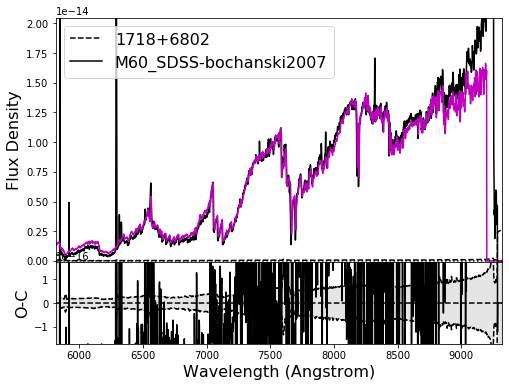

/home/ryan/projects/KASTr_data/final/kastRED_J1718+6802_20180622.fits


<Figure size 432x288 with 0 Axes>

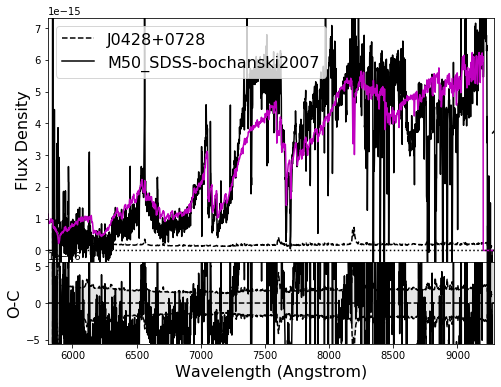

/home/ryan/projects/KASTr_data/final/kastRED_J0428+0728_20180307.fits


<Figure size 432x288 with 0 Axes>

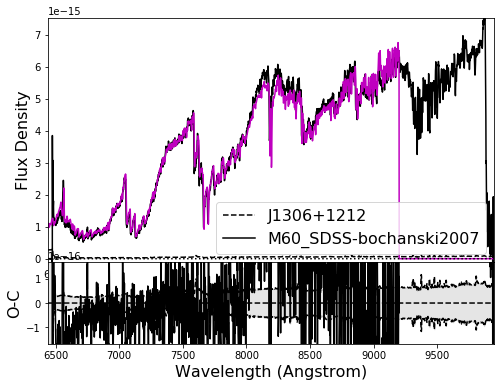

/home/ryan/projects/KASTr_data/final/kastRED_J1306+1212_20200203.fits


<Figure size 432x288 with 0 Axes>

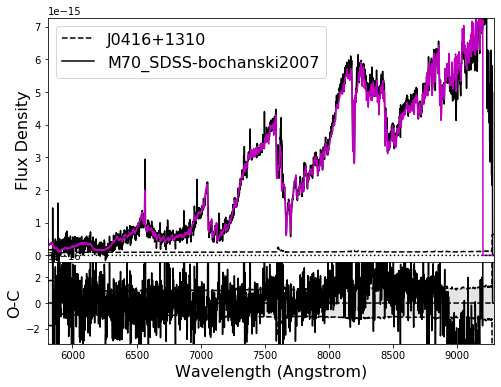

/home/ryan/projects/KASTr_data/final/kastRED_J0416+1310_20200204.fits


<Figure size 432x288 with 0 Axes>

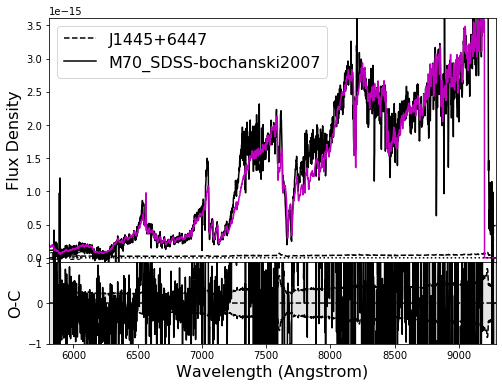

/home/ryan/projects/KASTr_data/final/kastRED_J1445+6447_20200311.fits


<Figure size 432x288 with 0 Axes>

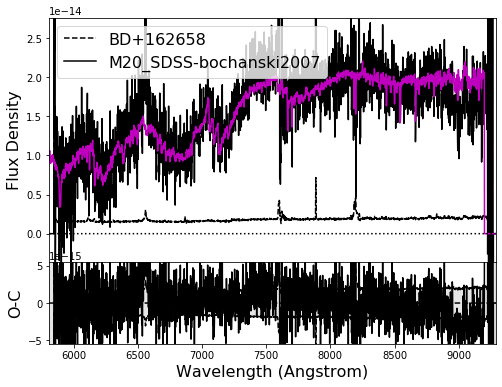

/home/ryan/projects/KASTr_data/final/kastRED_BD162658_20180307.fits


<Figure size 432x288 with 0 Axes>

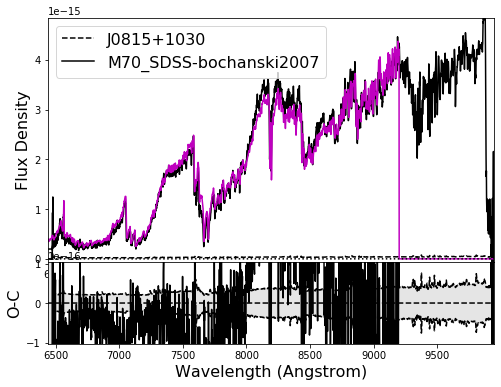

/home/ryan/projects/KASTr_data/final/kastRED_J0815+1030_20200203.fits


<Figure size 432x288 with 0 Axes>

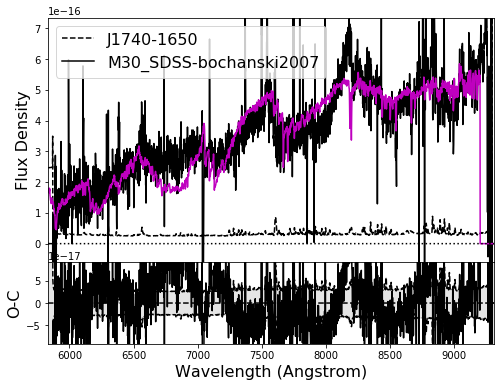

/home/ryan/projects/KASTr_data/final/kastRED_J1740-1650B_20190920.fits


<Figure size 432x288 with 0 Axes>

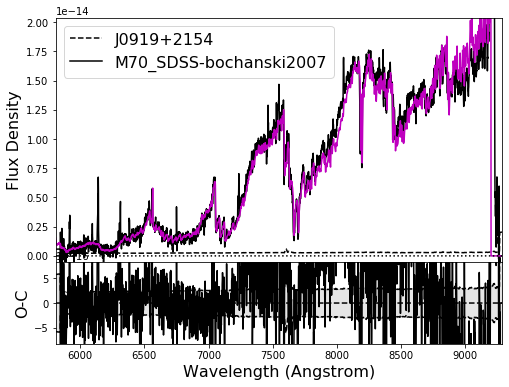

/home/ryan/projects/KASTr_data/final/kastRED_J0919+2154_20200305.fits


<Figure size 432x288 with 0 Axes>

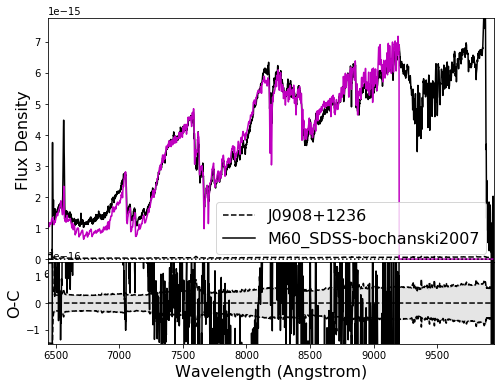

/home/ryan/projects/KASTr_data/final/kastRED_J0908+1236_20200203.fits


<Figure size 432x288 with 0 Axes>

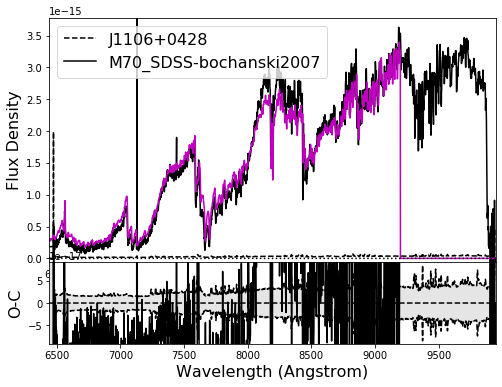

/home/ryan/projects/KASTr_data/final/kastRED_J1106+0428_20200203.fits


<Figure size 432x288 with 0 Axes>

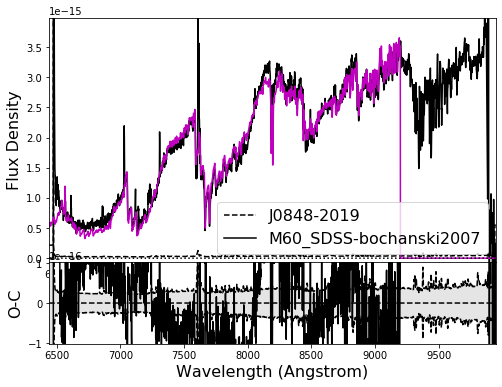

/home/ryan/projects/KASTr_data/final/kastRED_J0848-2019_20200203.fits


<Figure size 432x288 with 0 Axes>

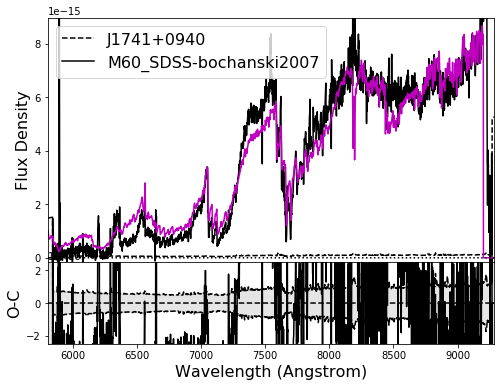

/home/ryan/projects/KASTr_data/final/kastRED_J1741+0940_20200305.fits


<Figure size 432x288 with 0 Axes>

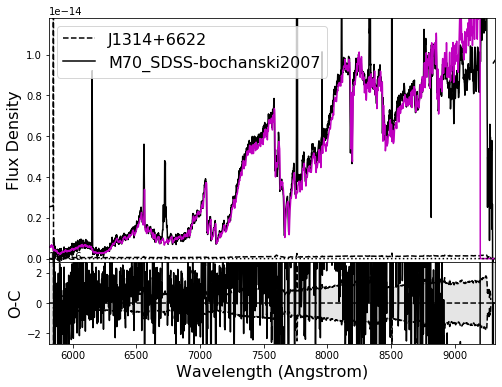

/home/ryan/projects/KASTr_data/final/kastRED_J1314+6622_20200205.fits


<Figure size 432x288 with 0 Axes>

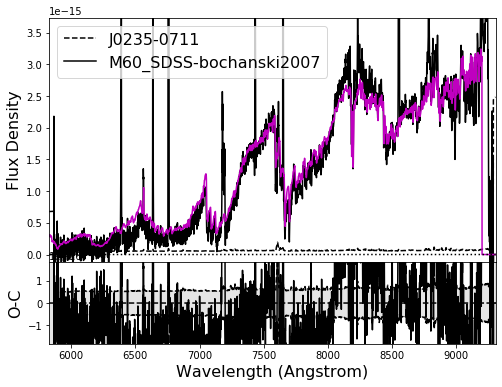

/home/ryan/projects/KASTr_data/final/kastRED_J0235-0711_20190918.fits


<Figure size 432x288 with 0 Axes>

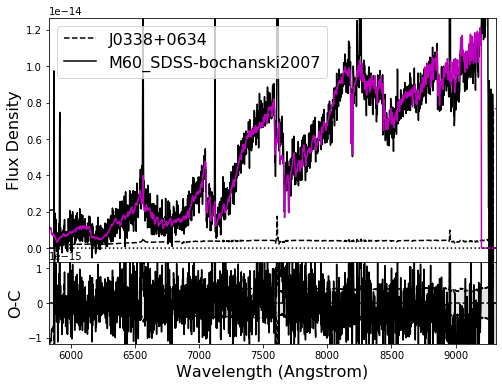

/home/ryan/projects/KASTr_data/final/kastRED_J0338+0634_20190920.fits


<Figure size 432x288 with 0 Axes>

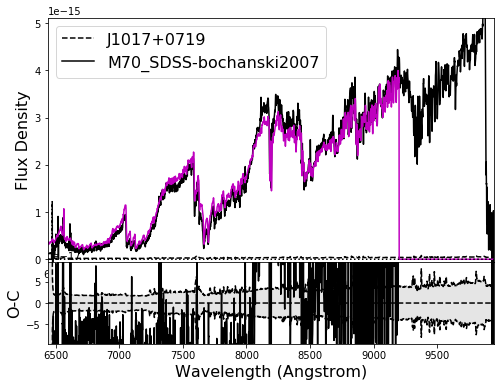

/home/ryan/projects/KASTr_data/final/kastRED_J1017+0719_20200203.fits


<Figure size 432x288 with 0 Axes>

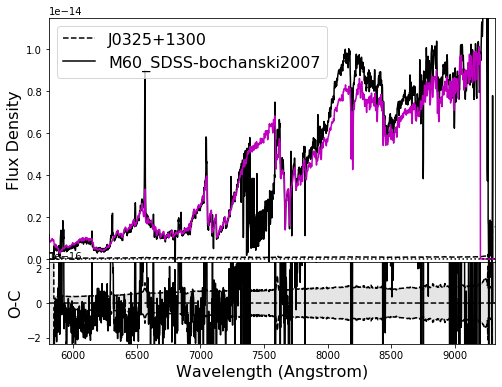

/home/ryan/projects/KASTr_data/final/kastRED_J0325+1300_20180308.fits


<Figure size 432x288 with 0 Axes>

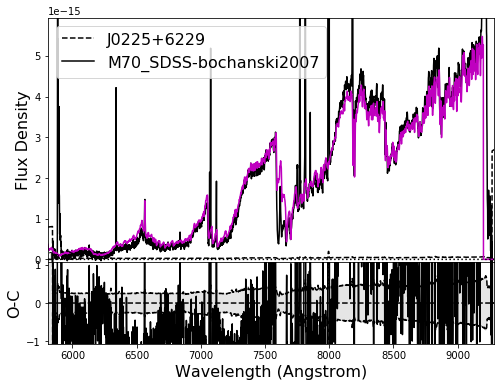

/home/ryan/projects/KASTr_data/final/kastRED_J0225+6229_20200107.fits


In [7]:
filenames = df[arr]['filename'].values

datapath = '/home/ryan/projects/KASTr_data/final/'

filepaths = [datapath + filename for filename in filenames]

diag_path = '/home/ryan/projects/TestingPNGs/Kast_Classify/QA/'

if diag_path is not None:

    if os.path.exists(diag_path):
        print('Path {} already exists'.format(diag_path))
    else:

        try:
            os.makedirs(diag_path)
        except OSError:
            print('Failed to create directory {}'.format(diag_path))


    print('Saving diagnostic plots to {}'.format(diag_path))

for filepath in filepaths:
    
    if diag_path is not None:
        diag_dir = diag_path + '/{}/'.format(os.path.splitext(os.path.basename(filepath))[0])
        if os.path.exists(diag_dir):
            print('Path {} already exists'.format(diag_dir))
        else:

            try:
                os.makedirs(diag_dir)
            except OSError:
                print('Failed to create directory {}'.format(diag_dir))
                diag_dir = None
    
    sp = kastredux.readSpectrum(filepath)
    
    sp.name = fits.getheader(filepath)['OBJECT']
    
    kastclassify.classify_by_standard(sp, ref='SDSS', plot=True, file=diag_dir + sp.name + '_standardComparison_updated')
    
    print(filepath)

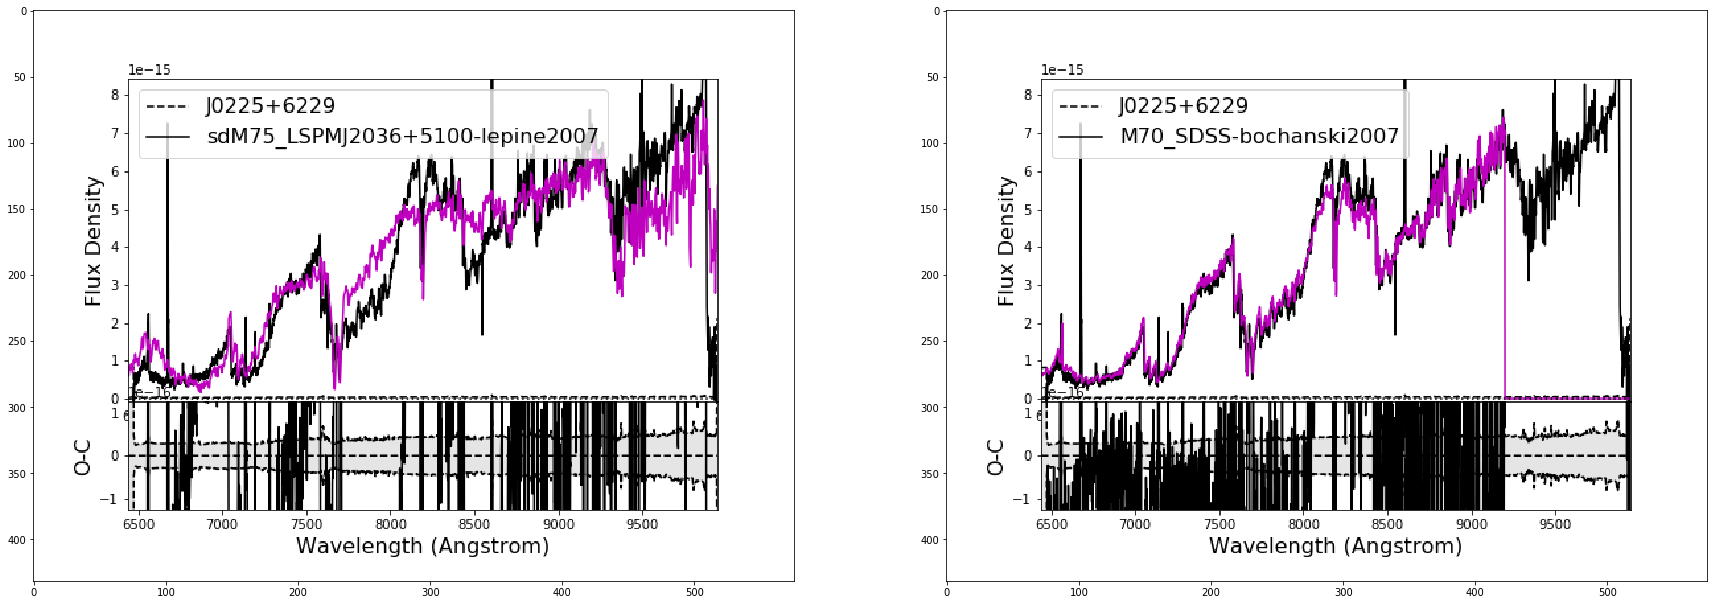

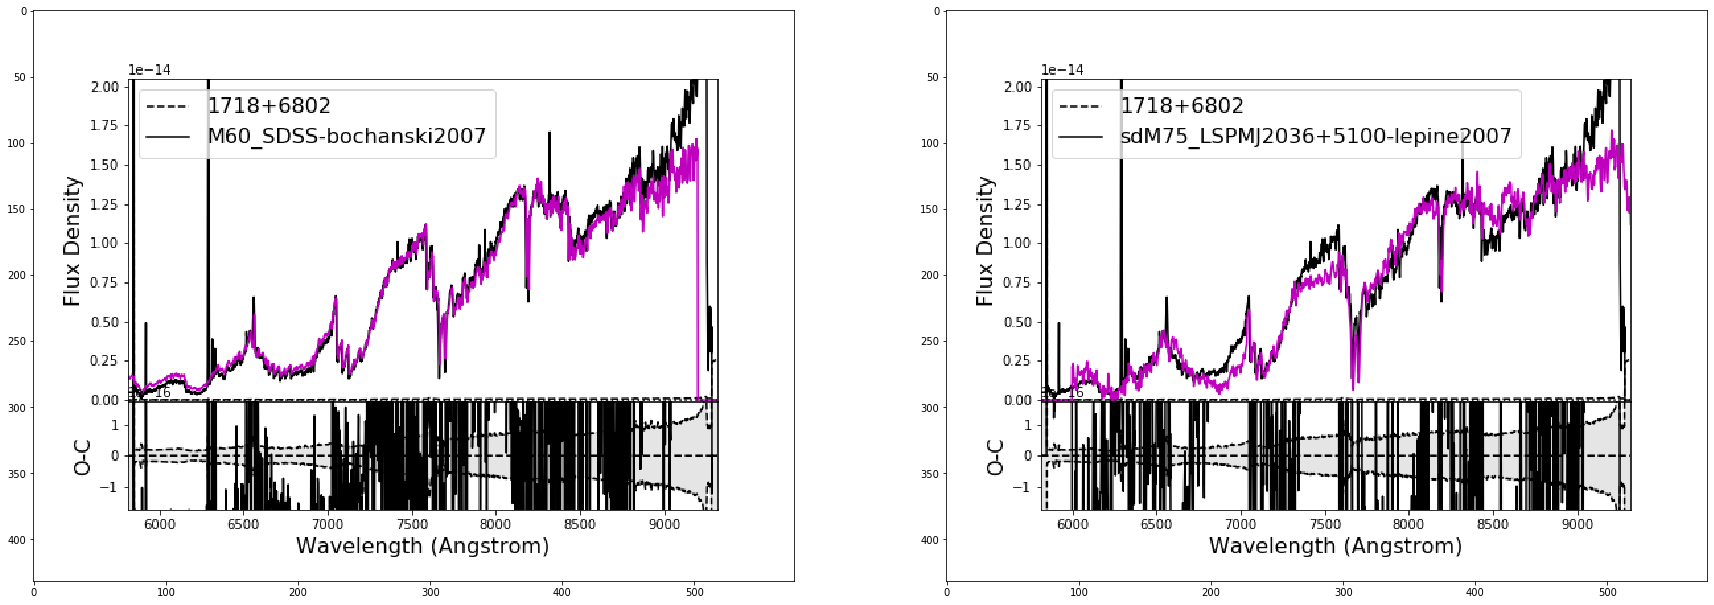

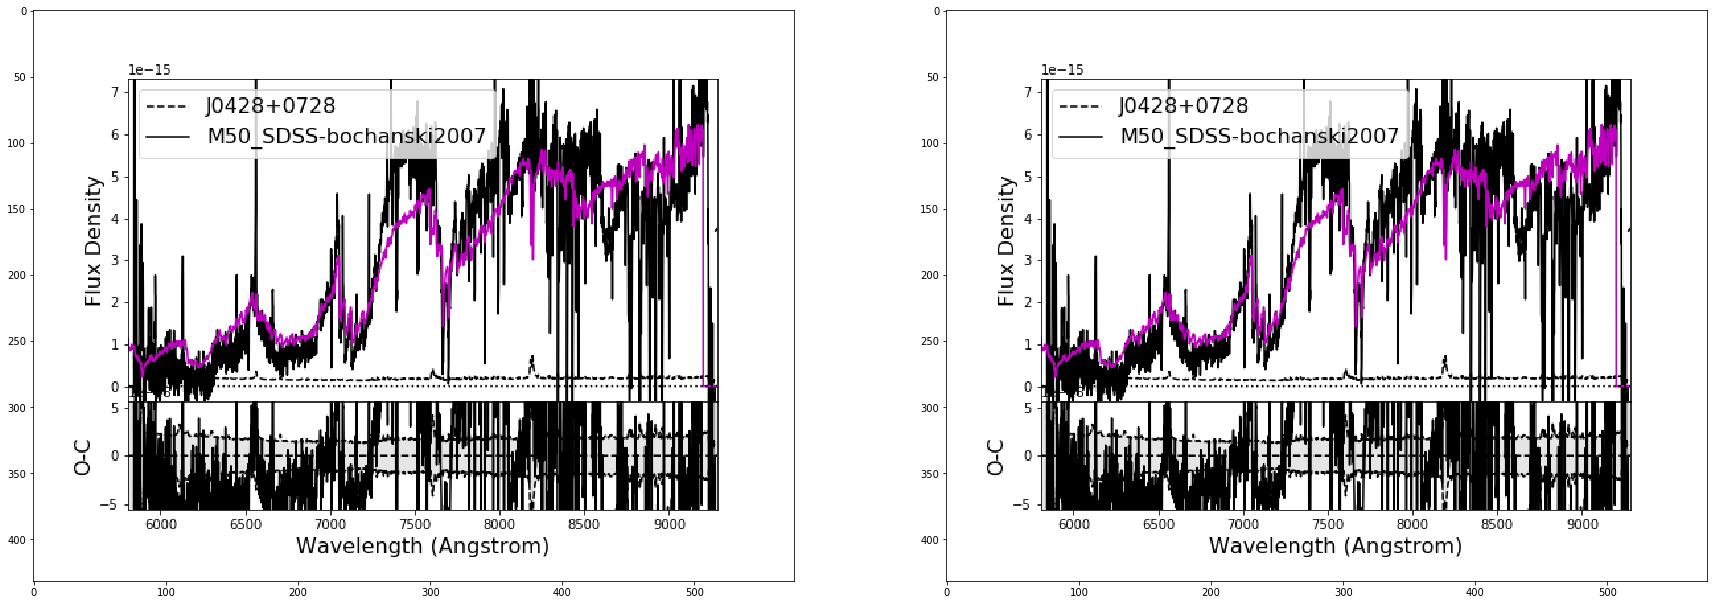

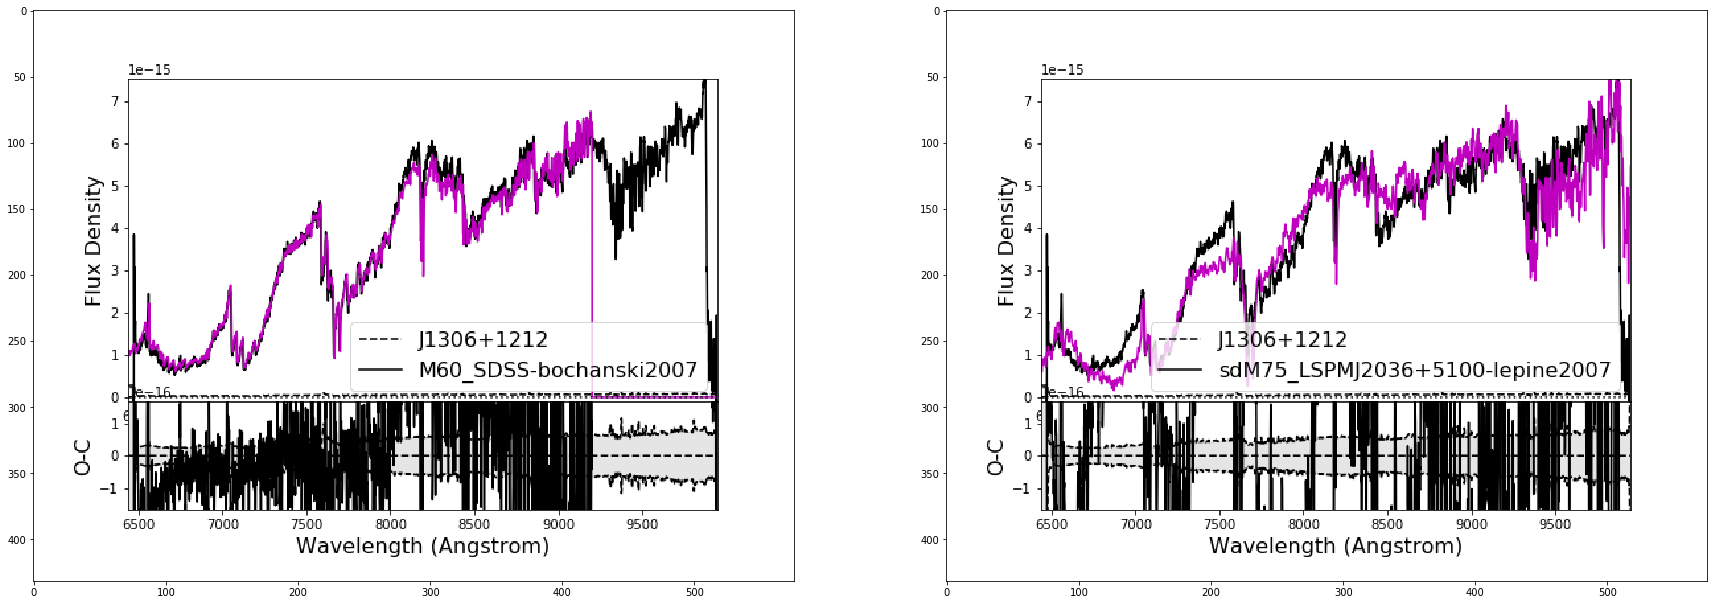

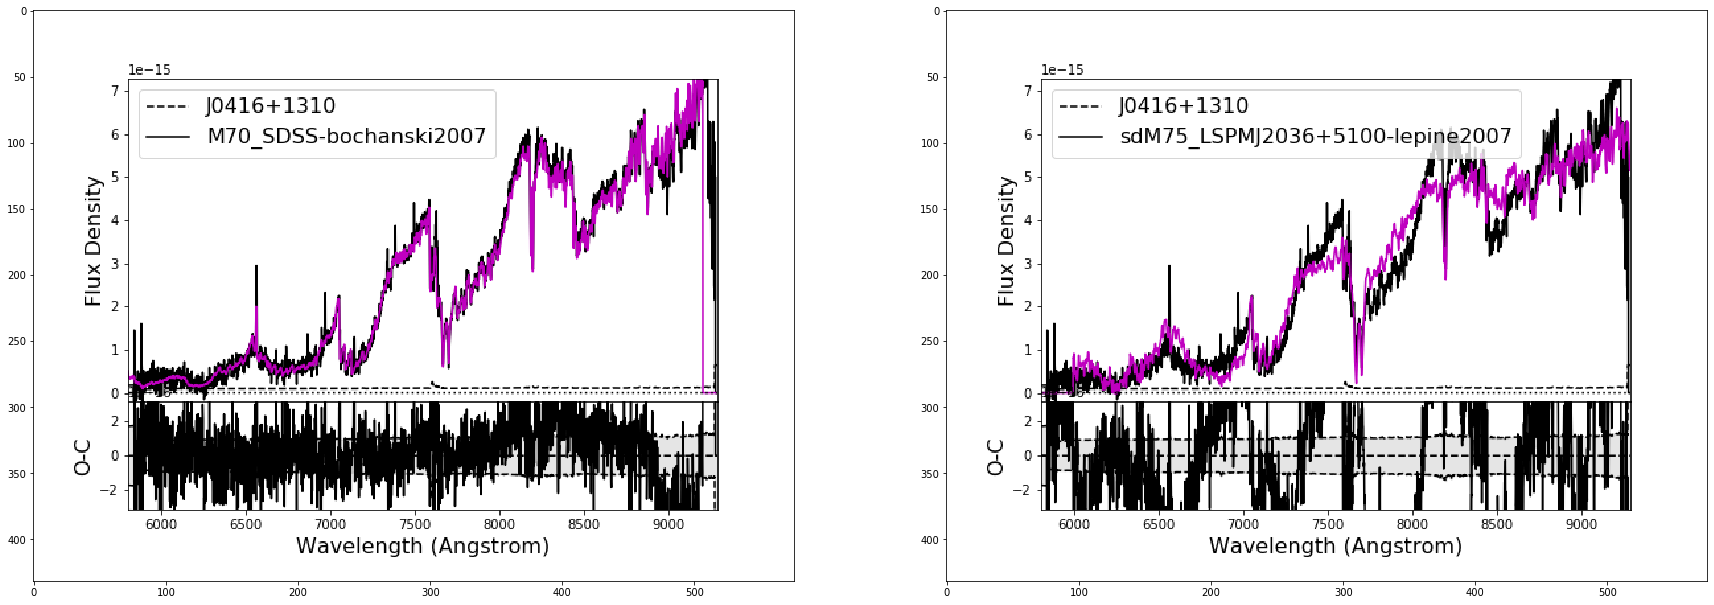

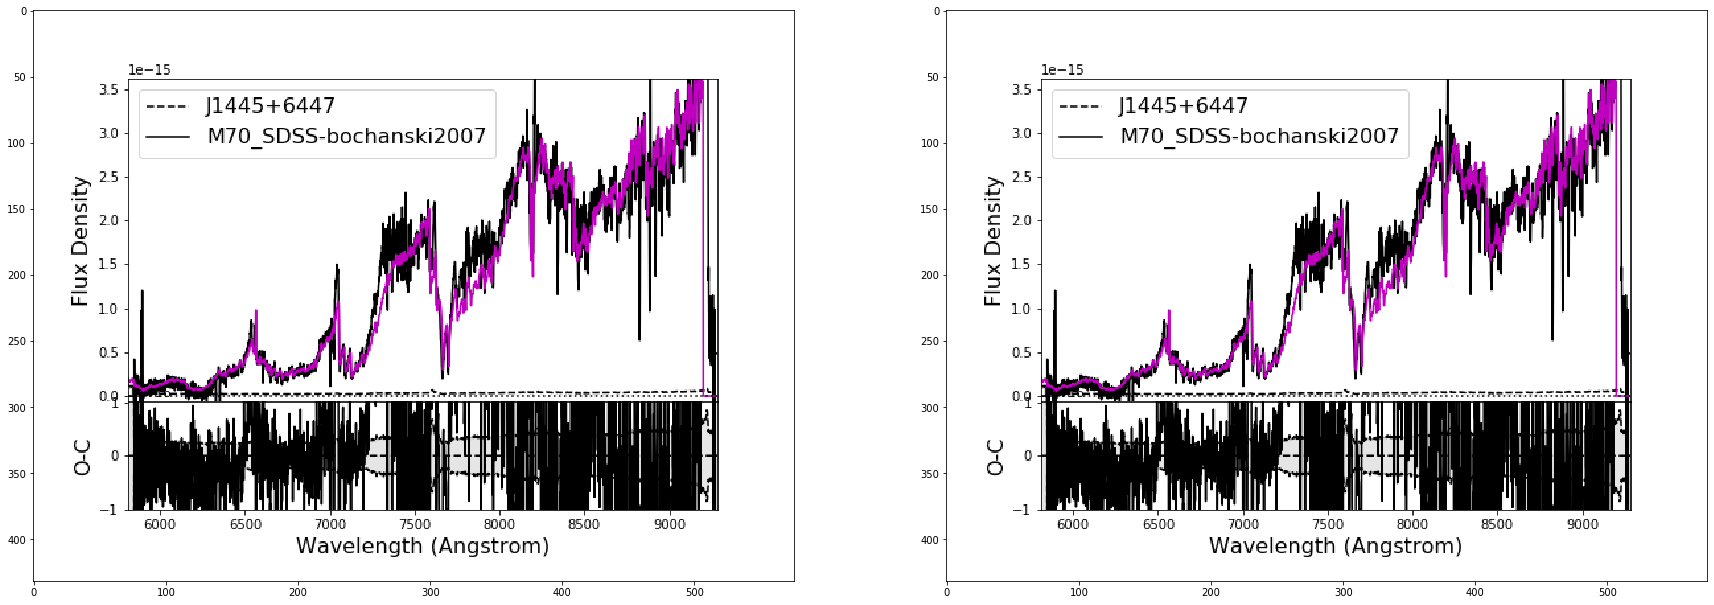

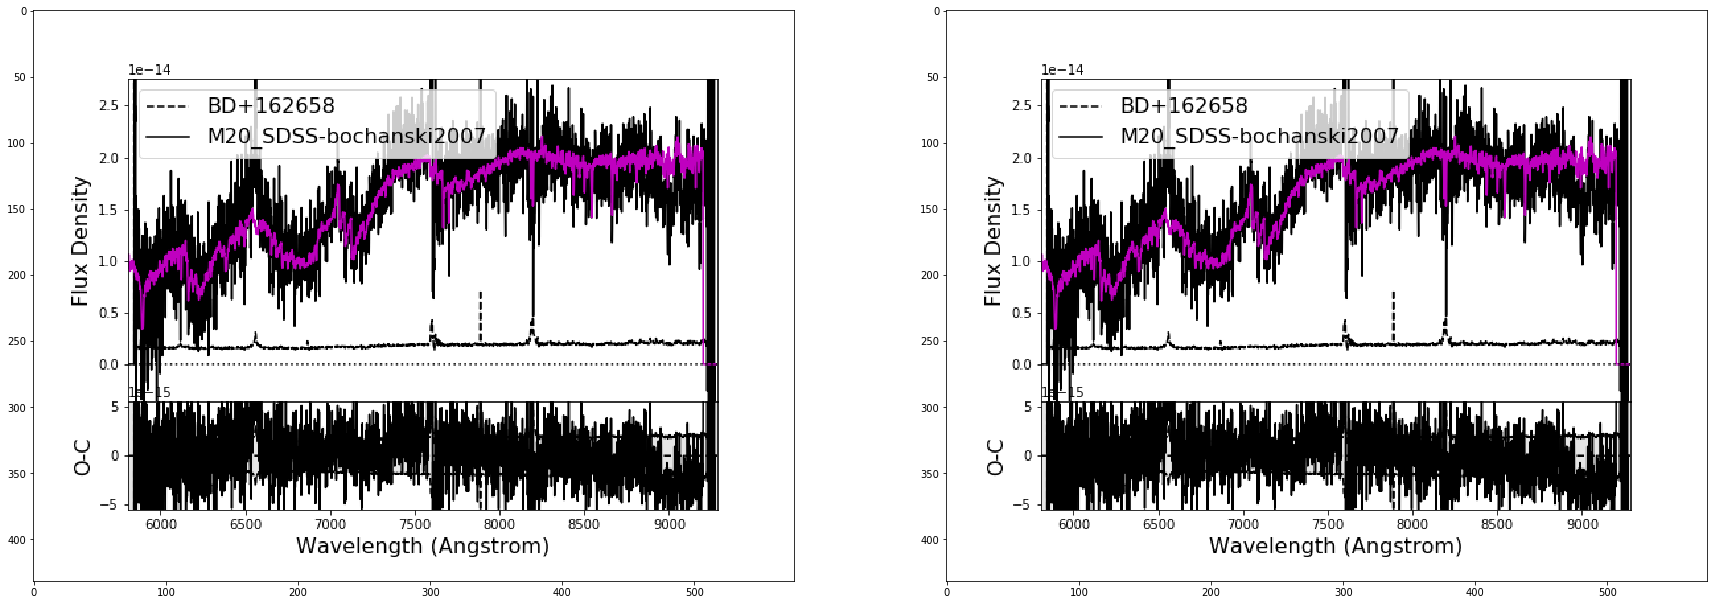

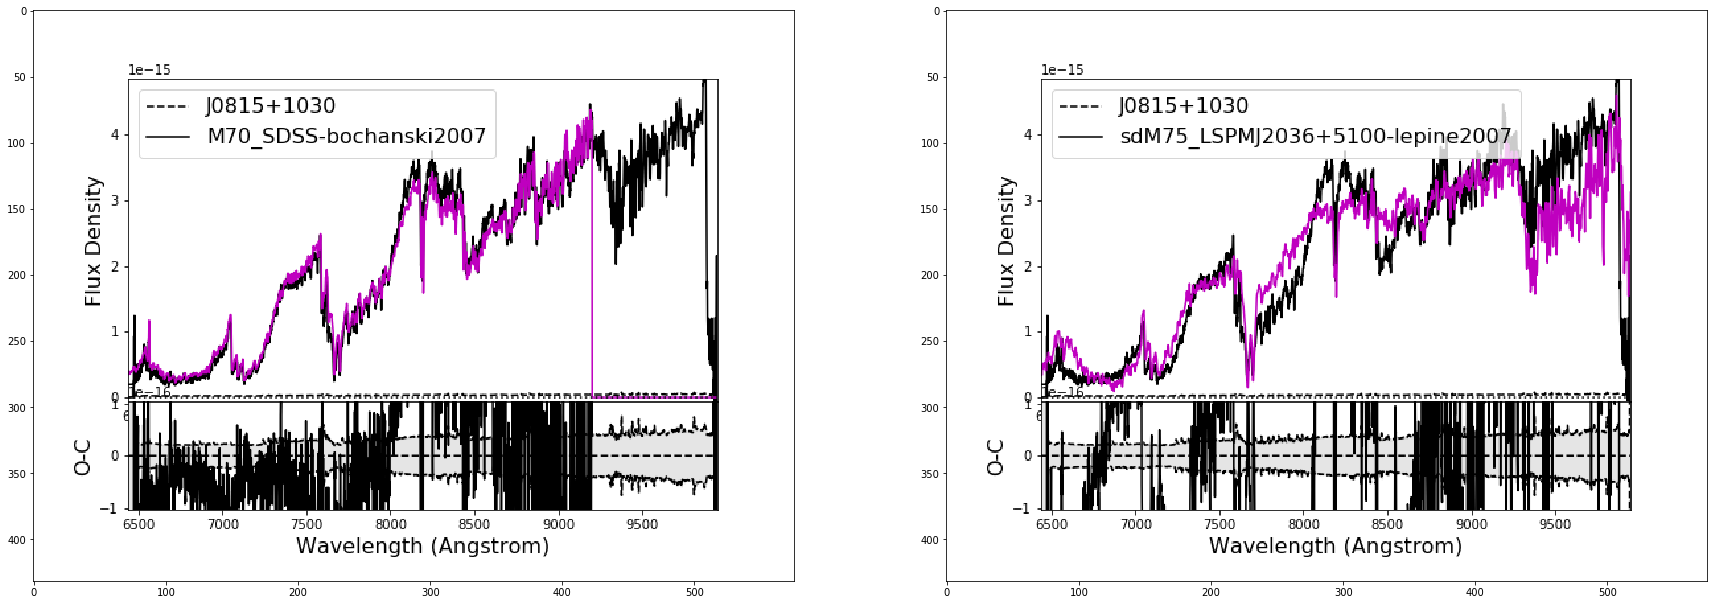

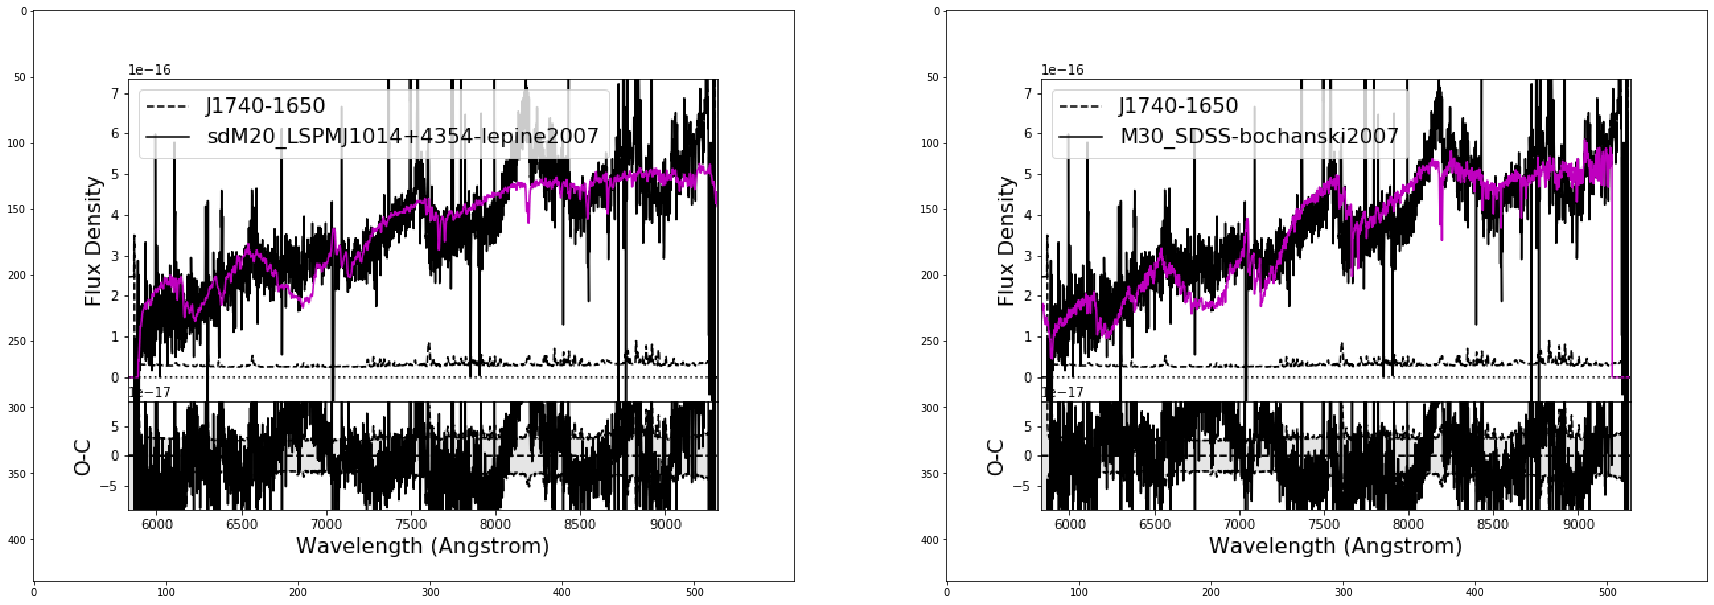

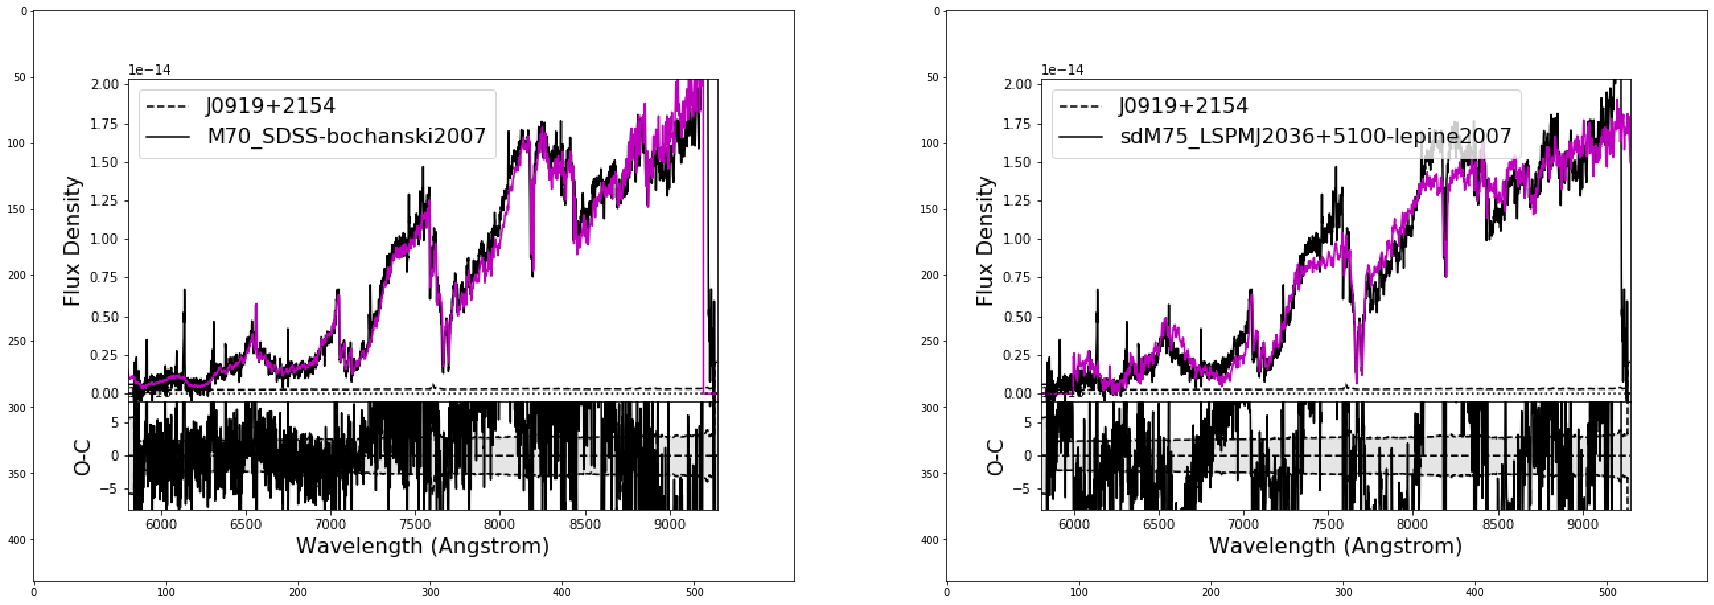

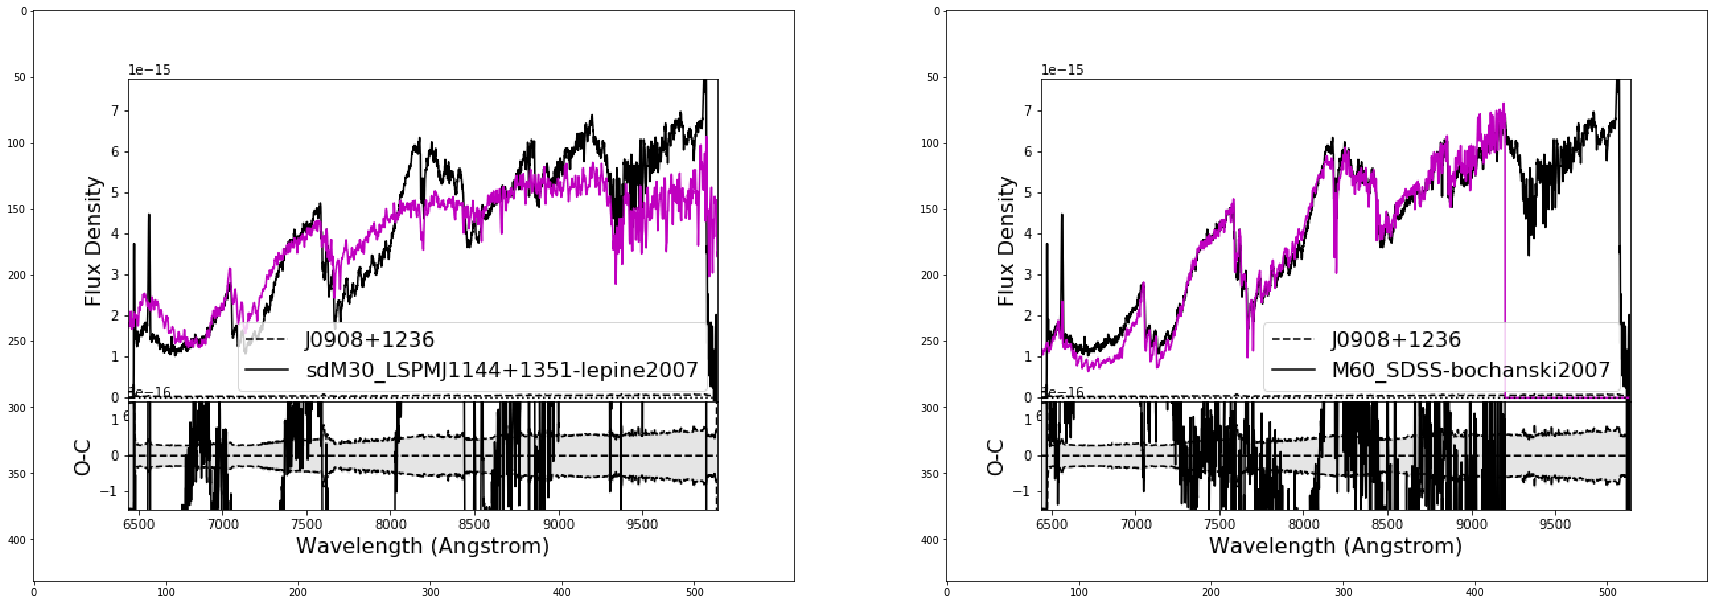

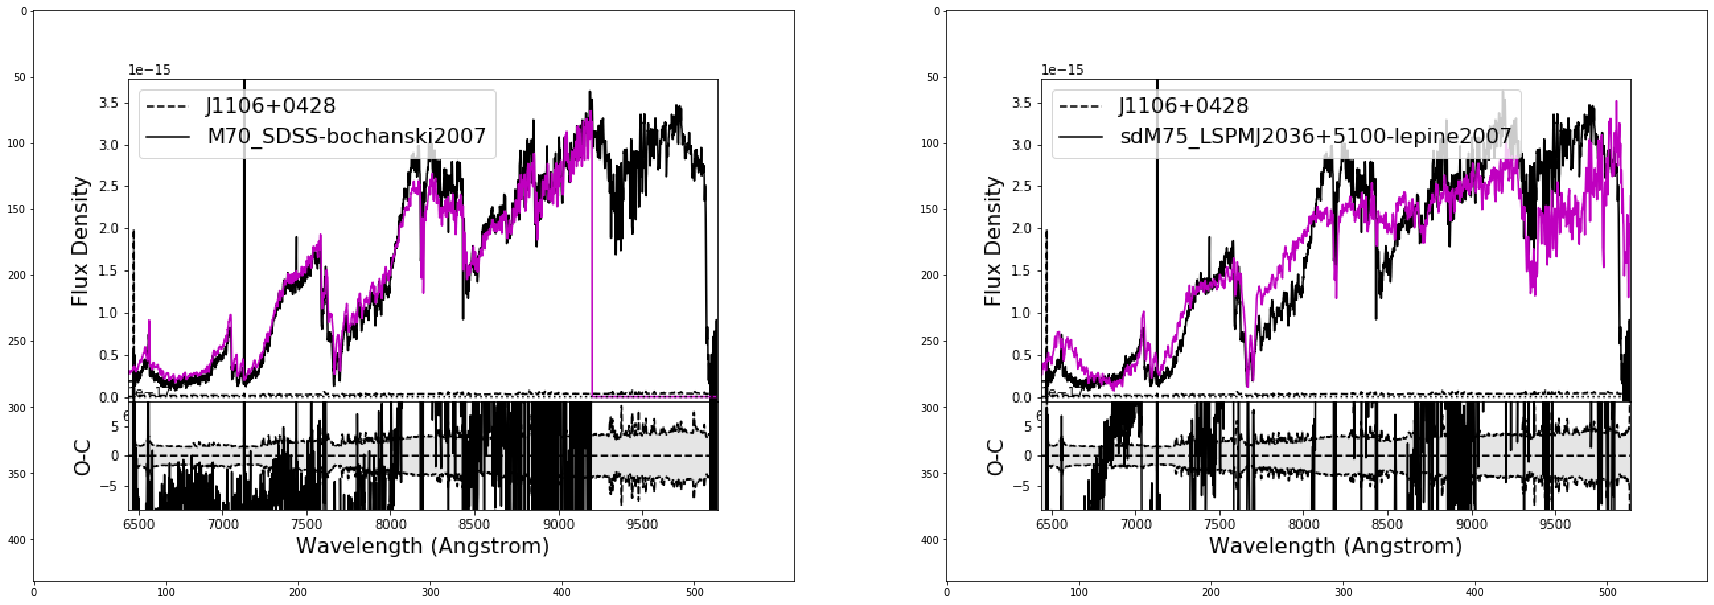

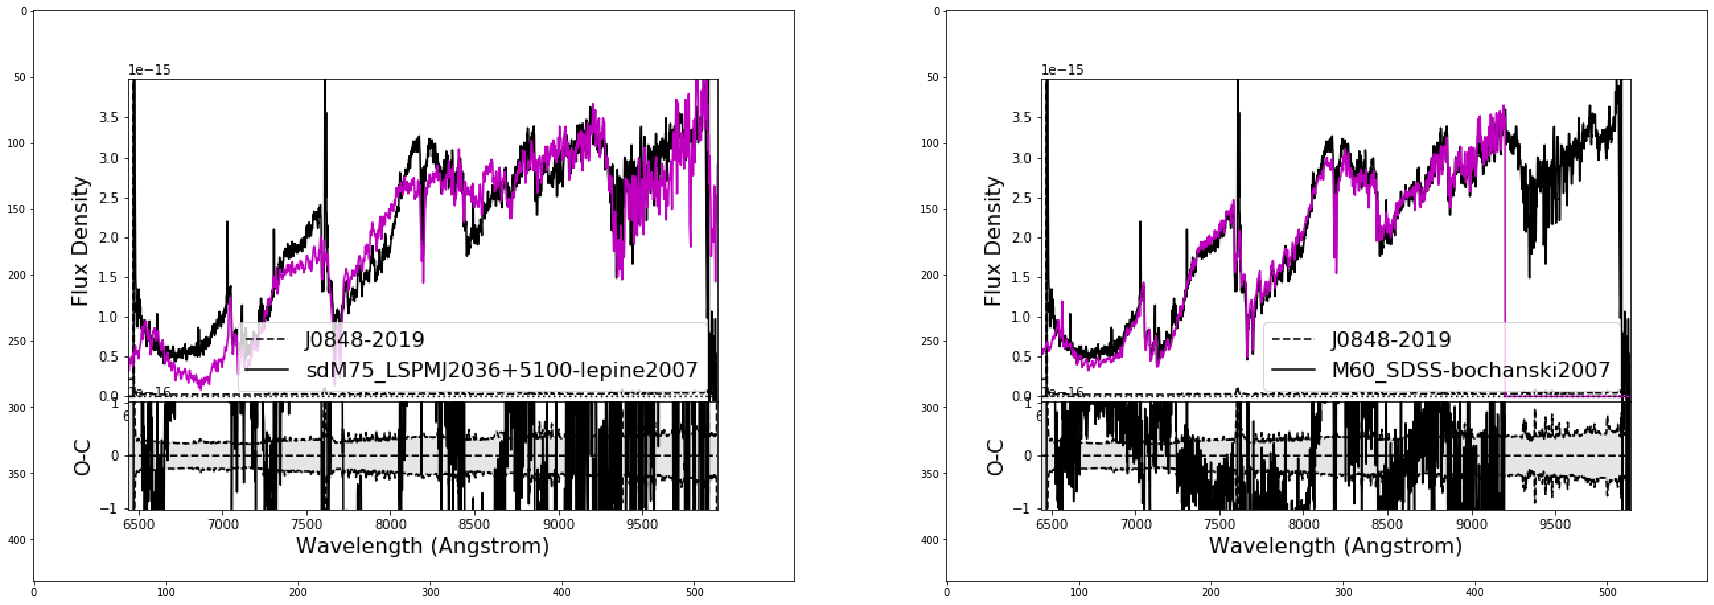

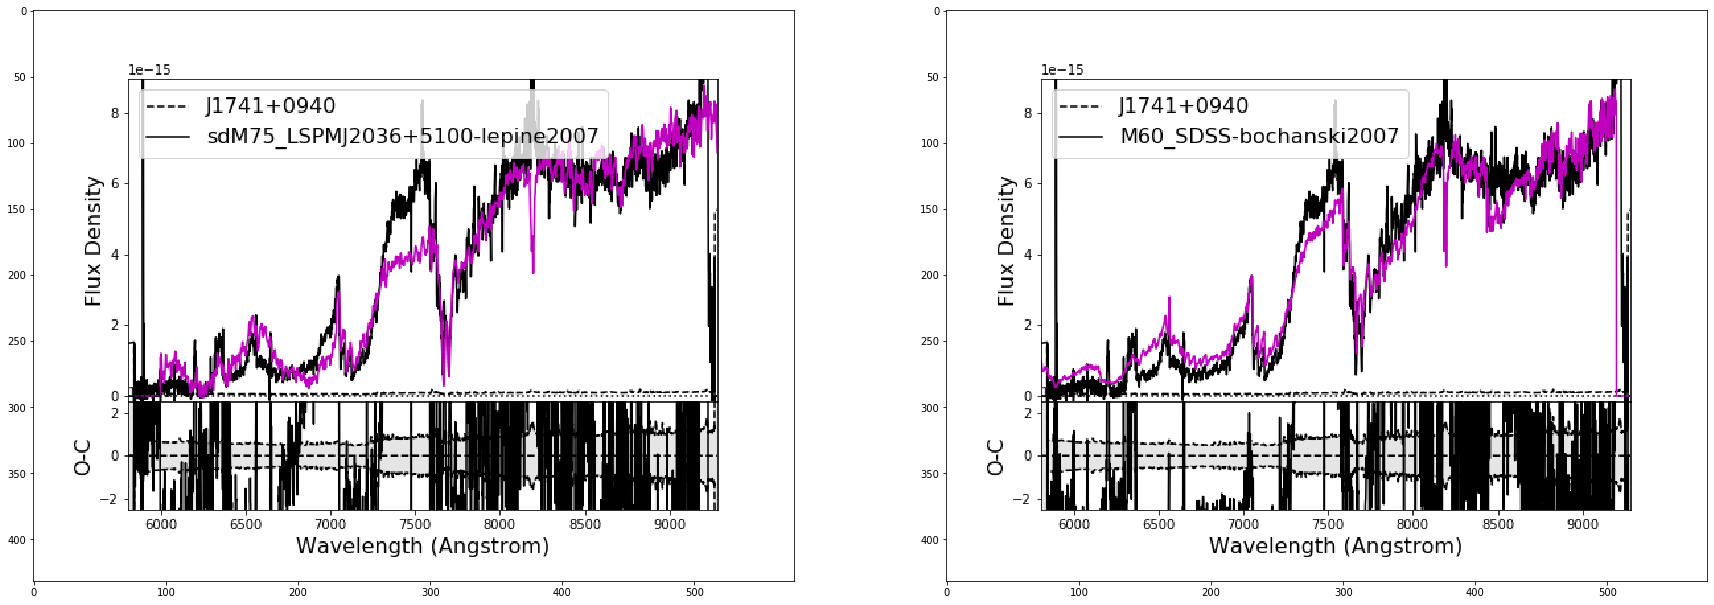

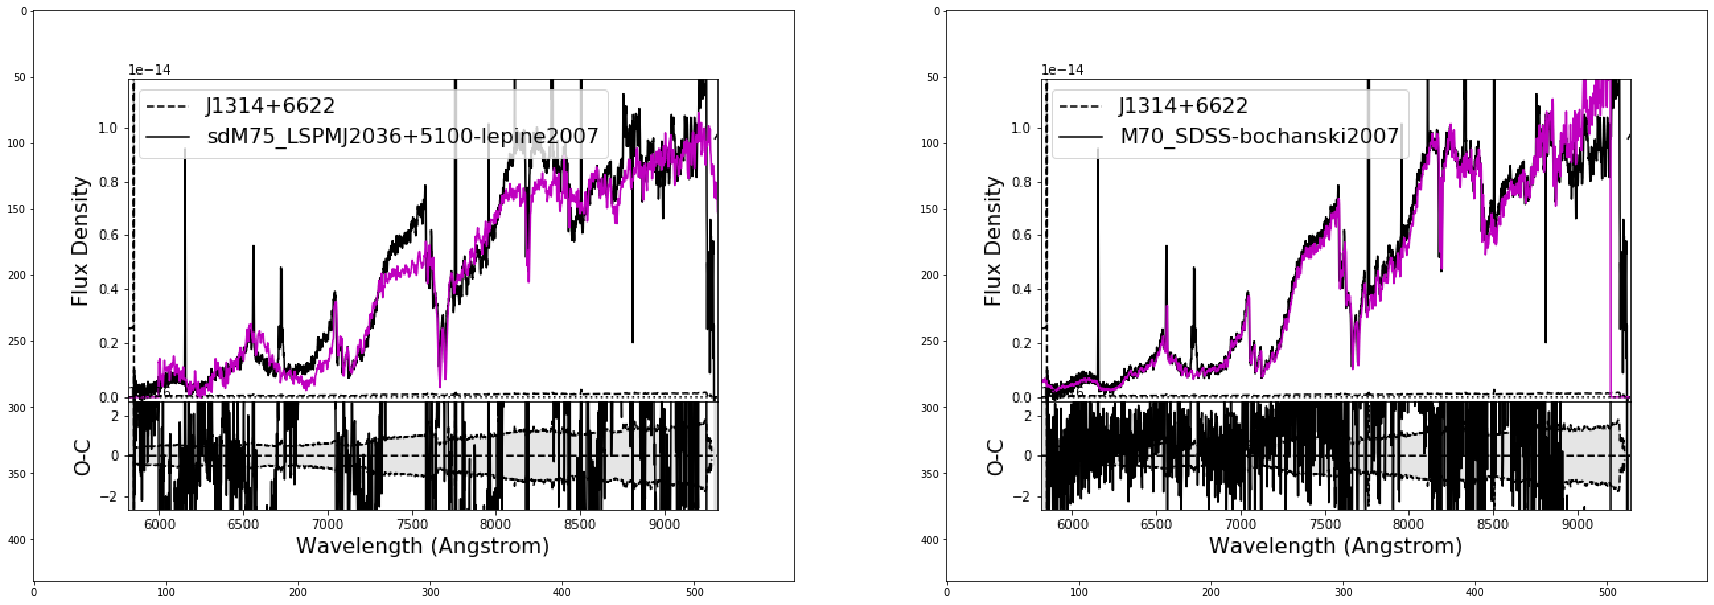

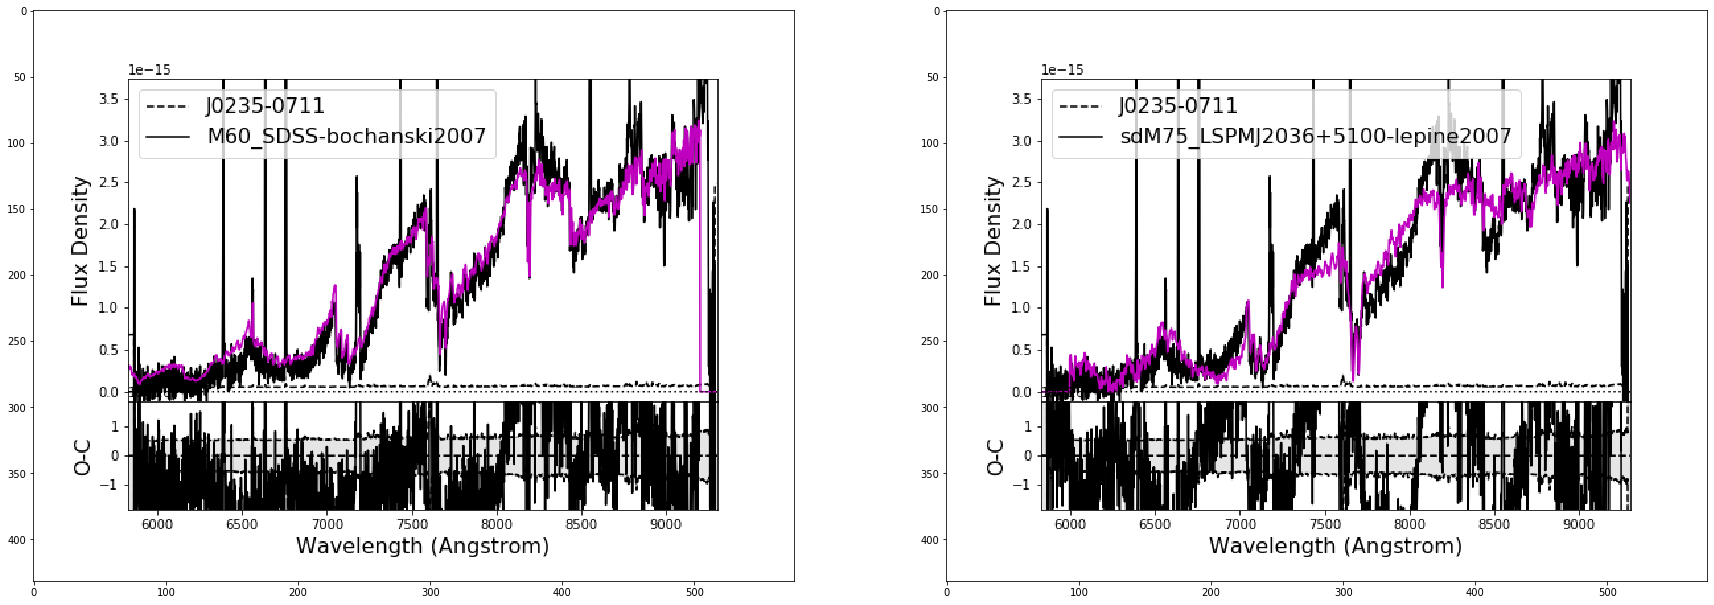

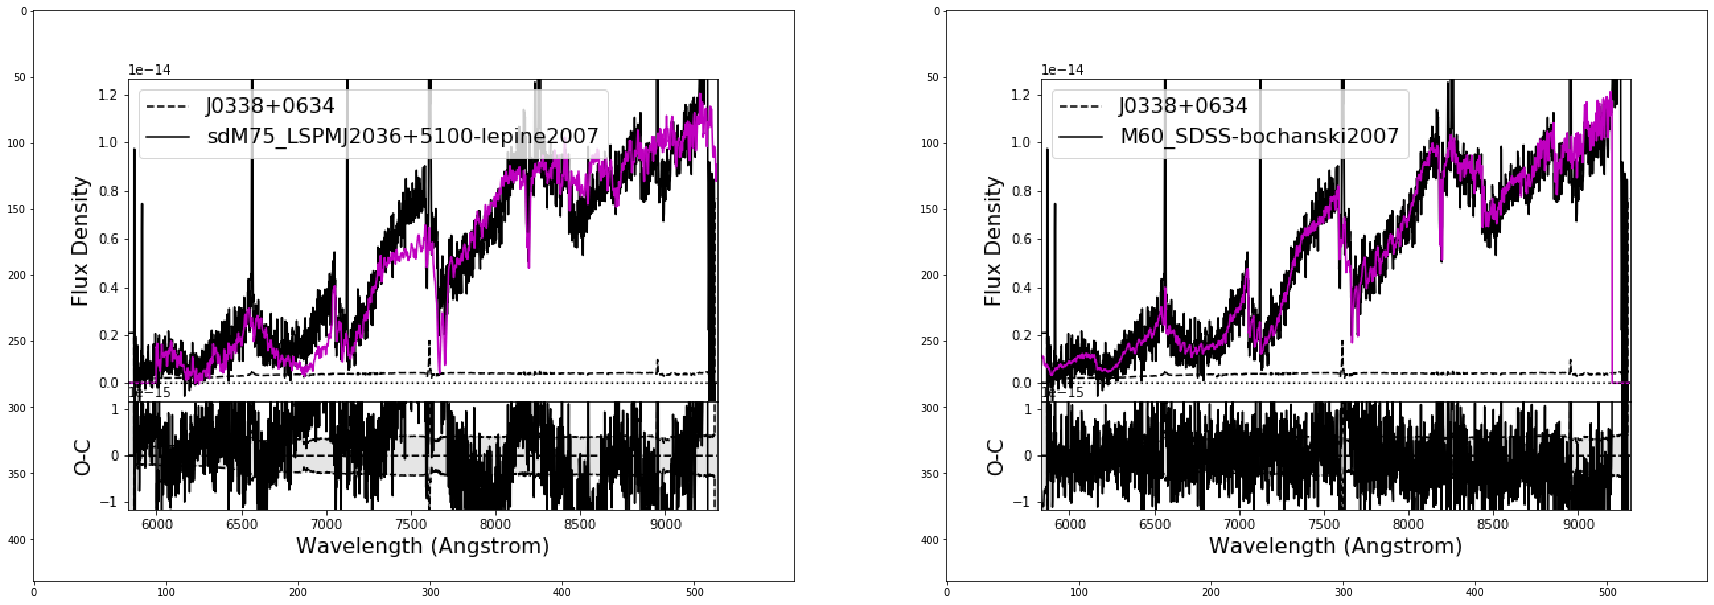

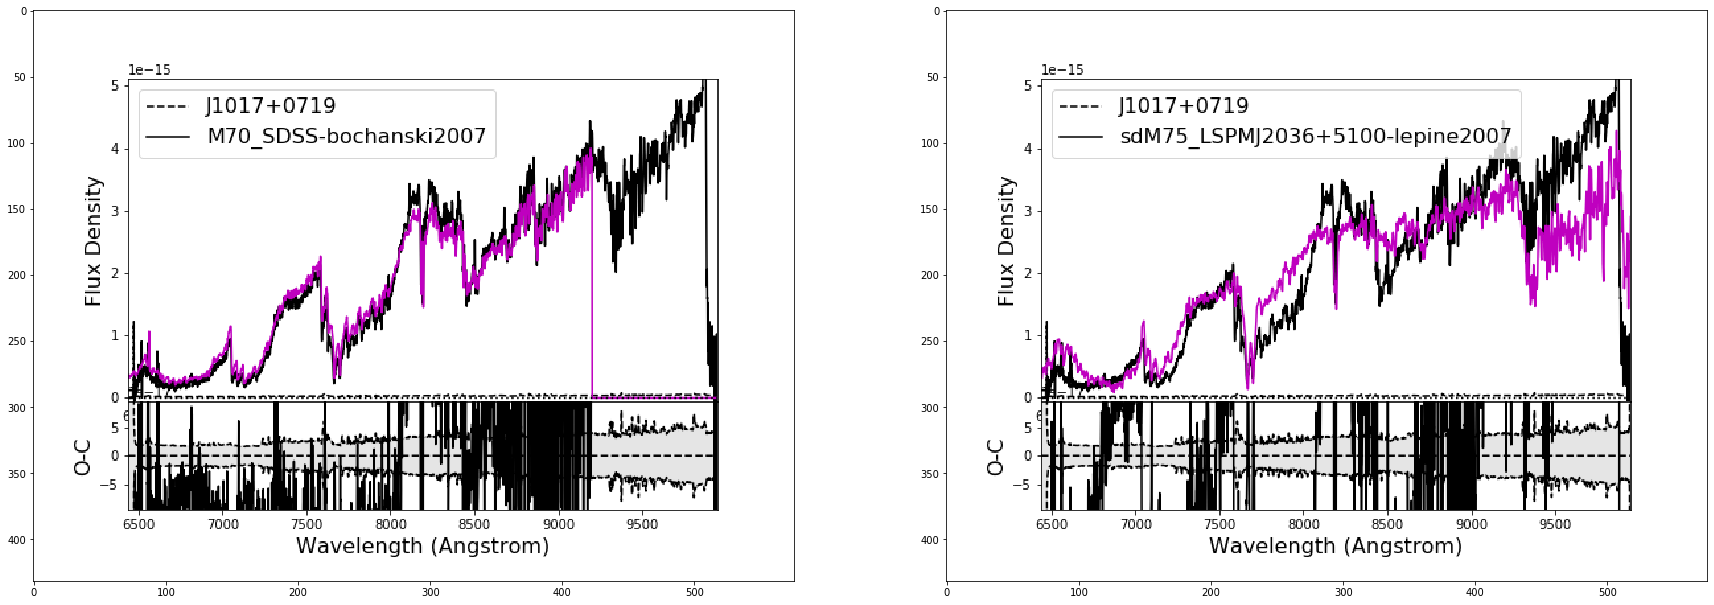

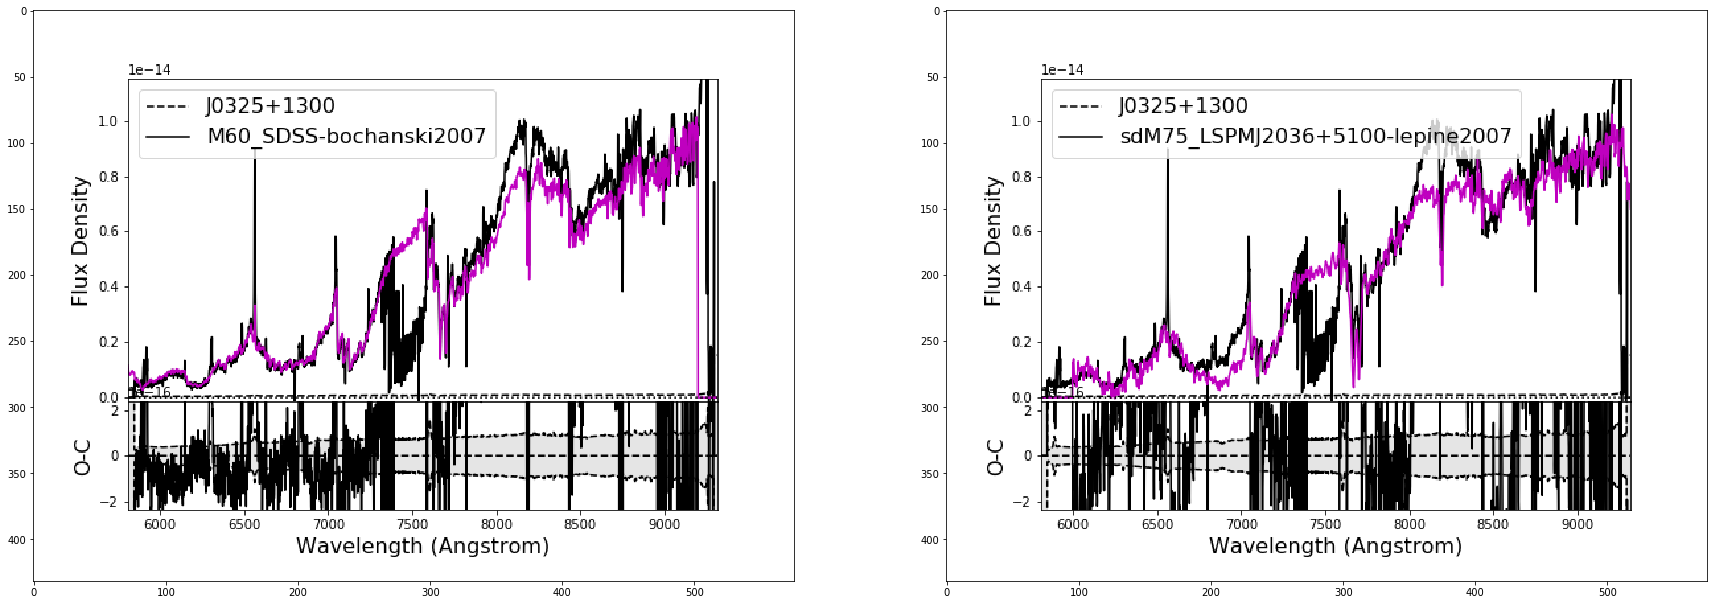

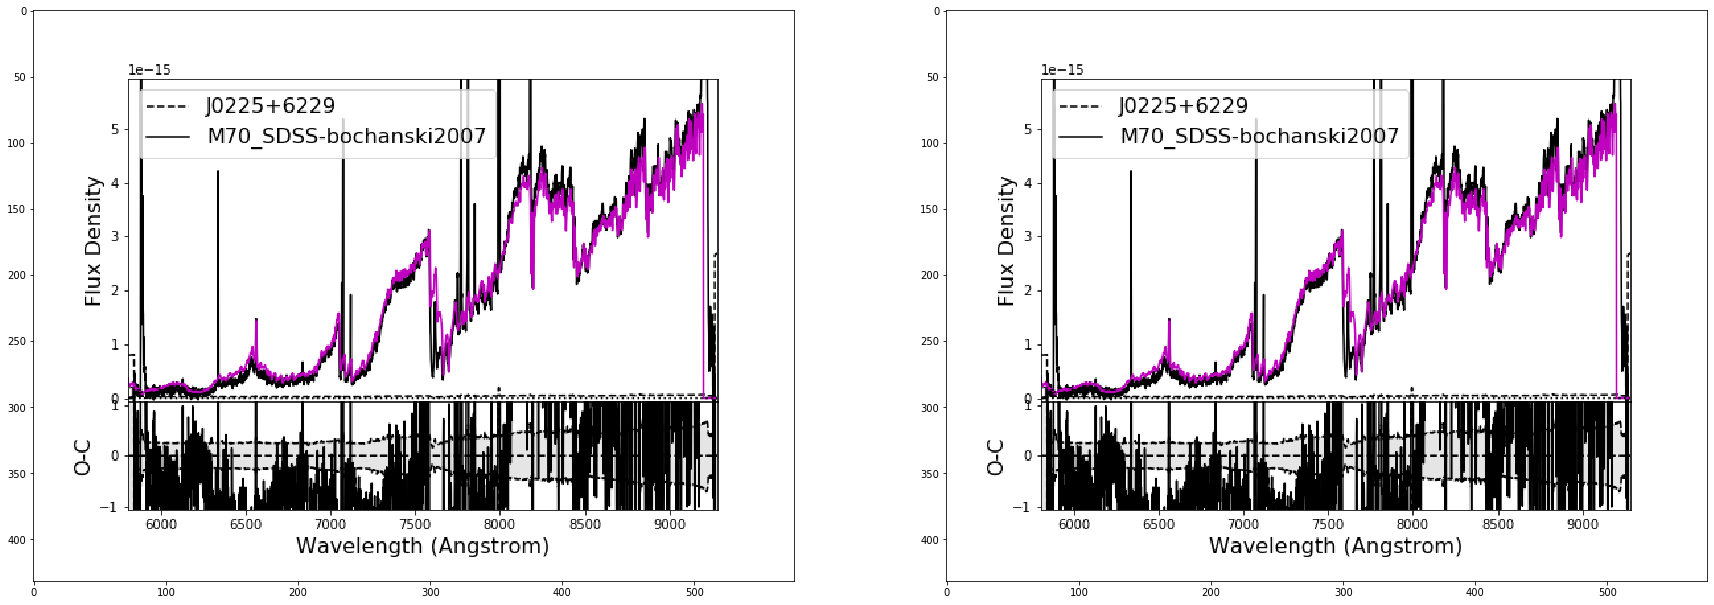

In [16]:
QA_path = '/home/ryan/projects/TestingPNGs/20200624/'

for filename in filenames:
    fname = filename[:-5]
    fpath = QA_path + fname + '/*standardComparison*'
    
    images = glob.glob(fpath)
    
    im1 = plt.imread(images[0])
    im2 = plt.imread(images[1])
    
    fig, ax = plt.subplots(1, 2, figsize=[30,15])
    
    ax[0].imshow(im1)
    ax[1].imshow(im2)
    
    fig.show()